In [1]:
# Импорт цен акций за указанный период
import urllib.request
import datetime
import time
import math
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sps
from sklearn import model_selection, datasets, linear_model, metrics, preprocessing
from sklearn.model_selection import TimeSeriesSplit
from catboost import CatBoostRegressor
import warnings
warnings.filterwarnings('ignore')
# Тикеры акций и их id в системе Finam
tickers={'DJ.W1IDU':20447,'DJ.W1FIN':20459,'NASDAQCOMP':82075,'EURUSD':83,'USDCNY':83225,'INDUSDX':438796,'NYMEX.NG':18949,'ICE.BRN':19473,'GDAX.BCH-USD':491809,'comex.SI':18952, 'comex.GC':18953, 'USDCB':82485, 'D&J-IND':91, 'LME.Nickel':18932,'LME.Alum':18930, 'RTSI':95,'ABRD':82460,'AESL':181867,'AFKS':19715,'AFLT':29,'AGRO':399716,'AKRN':17564,'ALBK':82616,'ALNU':81882,'ALRS':81820,'AMEZ':20702,'APTK':13855,'AQUA':35238,'ARMD':19676,'ARSA':19915,'ASSB':16452,'AVAN':82843,'AVAZ':39,'AVAZP':40,'BANE':81757,'BANEP':81758,'BGDE':175840,'BISV':35242,'BISVP':35243,'BLNG':21078,'BRZL':81901,'BSPB':20066,'CBOM':420694,'CHEP':20999,'CHGZ':81933,'CHKZ':21000,'CHMF':16136,'CHMK':21001,'CHZN':19960,'CLSB':16712,'CLSBP':16713,'CNTL':21002,'CNTLP':81575,'DASB':16825,'DGBZ':17919,'DIOD':35363,'DIXY':18564,'DVEC':19724,'DZRD':74744,'DZRDP':74745,'ELTZ':81934,'ENRU':16440,'EPLN':451471,'ERCO':81935,'FEES':20509,'FESH':20708,'FORTP':82164,'GAZA':81997,'GAZAP':81998,'GAZC':81398,'GAZP':16842,'GAZS':81399,'GAZT':82115,'GCHE':20125,'GMKN':795,'GRAZ':16610,'GRNT':449114,'GTLC':152876,'GTPR':175842,'GTSS':436120,'HALS':17698,'HIMC':81939,'HIMCP':81940,'HYDR':20266,'IDJT':388276,'IDVP':409486,'IGST':81885,'IGST03':81886,'IGSTP':81887,'IRAO':20516,'IRGZ':9,'IRKT':15547,'ISKJ':17137,'JNOS':15722,'JNOSP':15723,'KAZT':81941,'KAZTP':81942,'KBSB':19916,'KBTK':35285,'KCHE':20030,'KCHEP':20498,'KGKC':83261,'KGKCP':152350,'KLSB':16329,'KMAZ':15544,'KMEZ':22525,'KMTZ':81903,'KOGK':20710,'KRKN':81891,'KRKNP':81892,'KRKO':81905,'KRKOP':81906,'KROT':510,'KROTP':511,'KRSB':20912,'KRSBP':20913,'KRSG':15518,'KSGR':75094,'KTSB':16284,'KTSBP':16285,'KUBE':522,'KUNF':81943,'KUZB':83165,'KZMS':17359,'KZOS':81856,'KZOSP':81857,'LIFE':74584,'LKOH':8,'LNTA':385792,'LNZL':21004,'LNZLP':22094,'LPSB':16276,'LSNG':31,'LSNGP':542,'LSRG':19736,'LVHK':152517,'MAGE':74562,'MAGEP':74563,'MAGN':16782,'MERF':20947,'MFGS':30,'MFGSP':51,'MFON':152516,'MGNT':17086,'MGNZ':20892,'MGTS':12984,'MGTSP':12983,'MGVM':81829,'MISB':16330,'MISBP':16331,'MNFD':80390,'MOBB':82890,'MOEX':152798,'MORI':81944,'MOTZ':21116,'MRKC':20235,'MRKK':20412,'MRKP':20107,'MRKS':20346,'MRKU':20402,'MRKV':20286,'MRKY':20681,'MRKZ':20309,'MRSB':16359,'MSNG':6,'MSRS':16917,'MSST':152676,'MSTT':74549,'MTLR':21018,'MTLRP':80745,'MTSS':15523,'MUGS':81945,'MUGSP':81946,'MVID':19737,'NAUK':81992,'NFAZ':81287,'NKHP':450432,'NKNC':20100,'NKNCP':20101,'NKSH':81947,'NLMK':17046,'NMTP':19629,'NNSB':16615,'NNSBP':16616,'NPOF':81858,'NSVZ':81929,'NVTK':17370,'ODVA':20737,'OFCB':80728,'OGKB':18684,'OMSH':22891,'OMZZP':15844,'OPIN':20711,'OSMP':21006,'OTCP':407627,'PAZA':81896,'PHOR':81114,'PHST':19717,'PIKK':18654,'PLSM':81241,'PLZL':17123,'PMSB':16908,'PMSBP':16909,'POLY':175924,'PRFN':83121,'PRIM':17850,'PRIN':22806,'PRMB':80818,'PRTK':35247,'PSBR':152320,'QIWI':181610,'RASP':17713,'RBCM':74779,'RDRB':181755,'RGSS':181934,'RKKE':20321,'RLMN':152677,'RLMNP':388313,'RNAV':66644,'RODNP':66693,'ROLO':181316,'ROSB':16866,'ROSN':17273,'ROST':20637,'RSTI':20971,'RSTIP':20972,'RTGZ':152397,'RTKM':7,'RTKMP':15,'RTSB':16783,'RTSBP':16784,'RUAL':414279,'RUALR':74718,'RUGR':66893,'RUSI':81786,'RUSP':20712,'RZSB':16455,'SAGO':445,'SAGOP':70,'SARE':11,'SAREP':24,'SBER':3,'SBERP':23,'SELG':81360,'SELGP':82610,'SELL':21166,'SIBG':436091,'SIBN':2,'SKYC':83122,'SNGS':4,'SNGSP':13,'STSB':20087,'STSBP':20088,'SVAV':16080,'SYNG':19651,'SZPR':22401,'TAER':80593,'TANL':81914,'TANLP':81915,'TASB':16265,'TASBP':16266,'TATN':825,'TATNP':826,'TGKA':18382,'TGKB':17597,'TGKBP':18189,'TGKD':18310,'TGKDP':18391,'TGKN':18176,'TGKO':81899,'TNSE':420644,'TORS':16797,'TORSP':16798,'TRCN':74561,'TRMK':18441,'TRNFP':1012,'TTLK':18371,'TUCH':74746,'TUZA':20716,'UCSS':175781,'UKUZ':20717,'UNAC':22843,'UNKL':82493,'UPRO':18584,'URFD':75124,'URKA':19623,'URKZ':82611,'USBN':81953,'UTAR':15522,'UTII':81040,'UTSY':419504,'UWGN':414560,'VDSB':16352,'VGSB':16456,'VGSBP':16457,'VJGZ':81954,'VJGZP':81955,'VLHZ':17257,'VRAO':20958,'VRAOP':20959,'VRSB':16546,'VRSBP':16547,'VSMO':15965,'VSYD':83251,'VSYDP':83252,'VTBR':19043,'VTGK':19632,'VTRS':82886,'VZRZ':17068,'VZRZP':17067,'WTCM':19095,'WTCMP':19096,'YAKG':81917,'YKEN':81766,'YKENP':81769,'YNDX':388383,'YRSB':16342,'YRSBP':16343,'ZHIV':181674,'ZILL':81918,'ZMZN':556,'ZMZNP':603,'ZVEZ':82001,'FIVE':7,'DSKY':8,'SFIN':9,'RNFT':9}
# Доп.признаки
extra=['DJ.W1FIN','DJ.W1IDU','NASDAQCOMP','EURUSD','USDCNY','NYMEX.NG','INDUSDX','ICE.BRN','USDCB', 'LME.Alum','LME.Nickel','comex.GC','comex.SI','D&J-IND','GDAX.BCH-USD']
# Акции, входящие в индекс RTSI
RTSI=['GAZP','SBER','SBERP','LKOH','GMKN','YNDX','NVTK','TATN','TATNP','ROSN','SNGS','SNGSP','MGNT','FIVE','MTSS','POLY','ALRS','CHMF','PLZL','IRAO','NLMK','VTBR','MOEX','PHOR','TRNFP','MAGN','RTKM','RUAL','AFLT','PIKK','HYDR','FEES','AFKS','LSRG','CBOM','UPRO','DSKY','LNTA','SFIN','RNFT','MVID']
#Перевод массива строк в дату
def array2date(arr):
    new_arr=list()
    for item in arr:
        if len(item)==6:
            a=int(item[0:2])
            b=int(item[2:4])
            c=int(item[4:])
            new_arr.append(datetime.date(c,b,a))
        elif len(item)==8:
            a=int(item[6:])
            b=int(item[4:6])
            c=int(item[2:4])
            new_arr.append(datetime.date(c,b,a))
    return new_arr
# Формируем дату и время
def dtformed(d,mn,y,h=0,m=0,s=0):
    return datetime.datetime(y,mn,d,h,m,s)


# Возвращаем ID инструмента по его имени 
def getID(name):
    return tickers[name]
def load(name, dtstart=datetime.datetime.today(), 
         dtfin=datetime.datetime.today(),step=8, 
         market=1, MSOR=1, mstimever=0, sourse='finam', moment='close'):
    # market - инструмент
    # 0 — начала свечи, 1 — окончания свечи
    # mstimever - не московское — mstimever=0; московское — mstime='on', mstimever='1'
    #  период котировок (тики, 1 мин., 5 мин., 10 мин., 15 мин., 30 мин., 1 час, 1 день, 1 неделя, 1 месяц)
    id =getID(name) # id инстурмента
    e = '.txt' # расширение получаемого файла: .txt либо .csv
    yf = str(dtstart.year)
    yt = str(dtfin.year)
    month_start = str(dtstart.month)
    day_start = str(dtstart.day)
    month_end = str(dtfin.month)
    day_end = str(dtfin.day)
    dtf = '3' # формат даты (1 — ггггммдд, 2 — ггммдд, 3 — ддммгг, 4 — дд/мм/гг, 5 — мм/дд/гг)
    tmf = '1' # формат времени (1 — ччммсс, 2 — ччмм, 3 — чч: мм: сс, 4 — чч: мм)
    sep = '5' # параметр разделитель полей (1 — запятая (,), 2 — точка (.), 3 — точка с запятой (;), 4 — табуляция (»), 5 — пробел ( ))
    sep2 = '1' # параметр разделитель разрядов (1 — нет, 2 — точка (.), 3 — запятая (,), 4 — пробел ( ), 5 — кавычка ('))
    datf = '1' # Перечень получаемых данных (1-6)
    at = '0' # добавлять заголовок в файл (0 — нет, 1 — да)

    year_start = yf[2:]
    year_end = yt[2:]
    mf = (int(month_start.replace('0', ''))) - 1
    mt = (int(month_end.replace('0', ''))) - 1
    df = (int(day_start.replace('0', ''))) - 1
    dt = (int(day_end.replace('0', ''))) - 1
    
    user_agent = 'Chrome/98.0.4758.102 Safari/537.36'
    # Запрос
    headers={'User-Agent':user_agent,} 
    
    site='http://export.finam.ru/' + str(name) + '_' + str(year_start) + str(month_start) + str(
            day_start) + '_' + str(year_end) + str(month_end) + str(day_end) + str(e) + '?market=' + str(
            market) + '&em=' + str(id) + '&code=' + str(name) + '&apply=0&df=' + str(df) + '&mf=' + str(
            mf) + '&yf=' + str(yf) + '&from=' + str(day_start) + '.' + str(month_start) + '.' + str(yf) + '&dt=' + str(
            dt) + '&mt=' + str(mt) + '&yt=' + str(yt) + '&to=' + str(day_end) + '.' + str(month_end) + '.' + str(
            yt) + '&p=' + str(step) + '&f=' + str(name) + '_' + str(year_start) + str(month_start) + str(
            day_start) + '_' + str(year_end) + str(month_end) + str(day_end) + '&e=' + str(e) + '&cn=' + str(
            name) + '&dtf=' + str(dtf) + '&tmf=' + str(tmf) + '&MSOR=' + str(MSOR) + '&mstimever=' + str(
            mstimever) + '&sep=' + str(sep) + '&sep2=' + str(sep2) + '&datf=' + str(datf) + '&at=' + str(at)
    #Пока не удалось получить данные, пробуем это сделать
    errors=0
    while ('data' not in locals()):
        try:
            request=urllib.request.Request(site, None, headers) #The assembled request
            response = urllib.request.urlopen(request) 
            data = response.read() # The data u need
            #print(data)
        except urllib.error.HTTPError as e:
            errors+=1

    # Выделение нужных данных
    
    content = str(data)
    #print(content)
    stokelist=content.split(r'\r\n')
    n=len(stokelist)
    price_str=list()
    dates_str=list()
    for k in range(n-1):
        stokelist1=stokelist[k].split(' ')
        price_str.append(stokelist1[7])
        dates_str.append(stokelist1[2])
    dates=array2date(dates_str)
    prices=list()
    for item in price_str:
        prices.append(float(item))      
    return prices,dates


# Сбор и преобразование данных

In [2]:
a=datetime.date(20,1,3)
b=datetime.date(22,1,4)
#Скачиваем данные RTSI 
targets_=load("RTSI", dtformed(3, 1, 2020), dtformed(4,1,2022))
acc_indices=list()
for i in range(len(targets_[1])):
    acc_indices.append((targets_[1][i]-a).days)
#преобразуем данные, рассматриваем только дни, когда RTSI торгуется на бирже
def ext_data(arr):
    data=arr[0]
    time=arr[1]
    tmp=np.zeros(((b-a).days+1,1),dtype=np.float64) 
    npdataT=np.array([data],dtype=np.float64)
    npdata=np.transpose(npdataT)
    for i in range(len(time)):
        diff=(time[i]-a).days
        tmp[diff][0]=npdata[i][0]
    ext=np.zeros((len(acc_indices),1),dtype=np.float64)
    ind=0
    for i in range(len(tmp)):
        if i in set(acc_indices):
            ext[ind][0]=tmp[i][0]
            ind+=1
            
    return ext
#Заполняем пропуски, заполняя предыдущим значением
def the_filler(a):
    ind=0
    while a[ind,0]==0:
        ind+=1
    first_value=a[ind,0]
    for i in range(len(a)-1):
        if i<ind:
            a[i,0]=a[ind,0]
        elif a[i,0]!=0 and a[i+1,0]==0:
            a[i+1,0]=a[i,0]
    return a

In [3]:
#Данные по акицям, дополнительным признакам, RTSI
stocks_arr=list()
for item in RTSI:
    stocks_arr.append(ext_data(load(item, dtformed(3, 1, 2020), dtformed(4,1,2022))))
addstocks_arr=list()
for item in extra:
    addstocks_arr.append(ext_data(load(item, dtformed(3, 1, 2020), dtformed(4,1,2022))))
targets=ext_data(targets_)
#Объединяем массивы с данными по акциям
def arr_to_mtrx(arr):
    v=arr[0]
    for i in range(1,len(arr)):
        v=np.hstack((v,arr[i]))
    return v
for i in range(len(addstocks_arr)):
    addstocks_arr[i]=the_filler(addstocks_arr[i])
addstocks=arr_to_mtrx(addstocks_arr)
stocks=arr_to_mtrx(stocks_arr)
#Объединяем массивы с данными по акциям RTSI и массивы с данными доп.признаков
time=np.array([i for i in range(0,len(stocks))],dtype=np.int64).reshape((len(stocks),1))
full_stocks=np.hstack((stocks,time,addstocks,targets))
full_stocks_pd=pd.DataFrame(full_stocks, columns=RTSI+['Time']+extra+['RTSI'])

In [4]:
full_stocks_pd.head(5)

,GAZP,SBER,SBERP,LKOH,GMKN,YNDX,NVTK,TATN,TATNP,ROSN,...,INDUSDX,ICE.BRN,USDCB,LME.Alum,LME.Nickel,comex.GC,comex.SI,D&J-IND,GDAX.BCH-USD,RTSI
0,259.00,255.00,226.40,6294.0,19448.0,2685.0,1264.0,776.7,734.0,456.9,...,96.615,68.71,61.234,1819.0,13775.0,1555.2,18.095,28635.846857,221.16,1564.18
1,256.55,253.90,225.95,6382.0,19588.0,2672.0,1271.0,776.0,736.3,455.6,...,96.340,68.55,61.234,1832.0,13810.0,1565.7,18.150,28704.349170,244.47,1568.35
2,255.79,259.15,230.38,6496.5,19850.0,2677.0,1325.4,788.0,749.1,452.0,...,97.035,65.77,61.234,1800.5,14070.0,1559.0,18.150,28746.060578,239.82,1589.08
3,254.07,257.99,231.00,6430.0,19838.0,2728.4,1339.4,806.7,769.9,460.2,...,97.160,65.32,61.234,1804.0,14120.0,1553.6,17.925,28957.877730,237.65,1601.74
4,251.90,258.19,232.00,6490.0,19878.0,2725.0,1306.8,801.0,773.5,473.5,...,97.040,65.10,61.234,1798.5,14135.0,1563.2,18.130,28824.743235,271.83,1614.69


# График RTSI

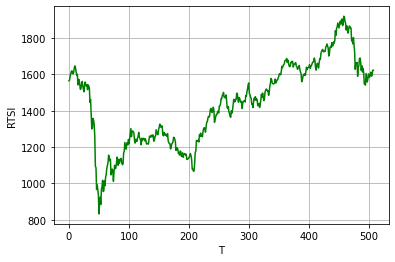

In [5]:
x=np.linspace(0,len(targets_[0]),len(targets_[0]))
fig, ax = plt.subplots()
ax.plot(x,targets_[0],color='green')
ax.grid()
ax.set_xlabel('T')
ax.set_ylabel('RTSI')
plt.show()

# Экспоненциальное сглаживание

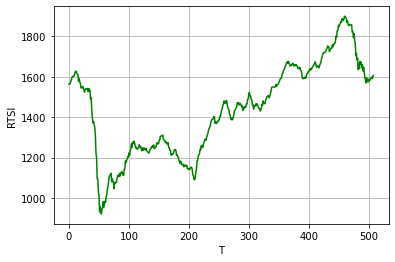

In [6]:
RTSI_list=list(targets_[0])[:-1]
def exp_smoothing(alpha,arr):
    exp_data=list()
    exp_data.append(arr[0])
    for i in range(0, len(RTSI_list)):
        exp_data.append(alpha*arr[i] + (1 - alpha) * exp_data[i - 1])
    return exp_data
exp_data=exp_smoothing(0.5,RTSI_list)
y=np.linspace(0,len(targets_[0]),len(targets_[0]))

fig, ax = plt.subplots()
ax.plot(y, exp_data,color='green')
ax.grid()
ax.set_xlabel('T')
ax.set_ylabel('RTSI')
plt.show()
    

In [7]:
#Разница между последним значением RTSI и его предсказанием по экспонециальному сглаживанию.
last_RTSI=targets_[0][-1]
print(np.abs(last_RTSI-exp_data[-1]))

15.741079341958539


# Нормализация

In [8]:
scaler = preprocessing.MinMaxScaler()
n_full_stocks = pd.DataFrame(np.hstack((scaler.fit_transform(full_stocks_pd.iloc[:,:-1]),targets)),columns=RTSI+['Time']+extra+['RTSI'])

# Линейная регрессия

# Без дополнительных признаков, без подбора гиперпараметров

In [9]:
t_targets, f_targets=n_full_stocks.iloc[:int(len(targets)*0.83),-1], n_full_stocks.iloc[int(len(targets)*0.83):,-1]
t_features, f_features=n_full_stocks.iloc[:int(len(targets)*0.83),:42], n_full_stocks.iloc[int(len(targets)*0.83):,:42]

In [10]:
model1=linear_model.Lasso()
model1.fit(t_features, t_targets)
metrics.r2_score(f_targets, model1.predict(f_features))

0.7029978628136934

# Со всеми дополнительными признаками, без подбора гиперпараметров

In [11]:
t_targets, f_targets=n_full_stocks.iloc[:int(len(targets)*0.83),-1], n_full_stocks.iloc[int(len(targets)*0.83):,-1]
t_features, f_features=n_full_stocks.iloc[:int(len(targets)*0.83),:-1], n_full_stocks.iloc[int(len(targets)*0.83):,:-1]

In [12]:
model1=linear_model.Lasso()
model1.fit(t_features, t_targets)
metrics.r2_score(f_targets, model1.predict(f_features))

0.6820032370902351

# Random Grid Search и Линейная регрессия

In [13]:
t_targets, f_targets=n_full_stocks.iloc[:int(len(targets)*0.8),-1], n_full_stocks.iloc[int(len(targets)*0.8):,-1]
t_features, f_features=n_full_stocks.iloc[:int(len(targets)*0.8),:42], n_full_stocks.iloc[int(len(targets)*0.8):,:42]
tscv = TimeSeriesSplit(n_splits=3)
model1=linear_model.Lasso()
print(model1.get_params().keys())
parameters_grid = {
    'max_iter' : np.arange(5,30),
    'alpha' : np.linspace(0.001, 4, num = 30),
}
grid3_cv = model_selection.RandomizedSearchCV(model1, parameters_grid, scoring = 'r2', cv = tscv, n_iter = 30, random_state=3)

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])


In [14]:
%%time
grid3_cv.fit(t_features, t_targets)
print(grid3_cv.best_estimator_)
print(grid3_cv.best_score_)
print(grid3_cv.best_params_)

Lasso(alpha=1.6557586206896548, max_iter=8)
0.5502869335145034
{'max_iter': 8, 'alpha': 1.6557586206896548}
Wall time: 2.35 s


In [15]:
metrics.r2_score(f_targets,grid3_cv.predict(f_features))

0.4401112705454294

# С дополнительными признаками

In [16]:
t_targets1, f_targets1=n_full_stocks.iloc[:int(len(targets)*0.8),-1], n_full_stocks.iloc[int(len(targets)*0.8):,-1]
t_features1, f_features1=n_full_stocks.iloc[:int(len(targets)*0.8),:-1], n_full_stocks.iloc[int(len(targets)*0.8):,:-1]

In [17]:
%%time
grid3_cv.fit(t_features1, t_targets1)
print(grid3_cv.best_estimator_)
print(grid3_cv.best_score_)
print(grid3_cv.best_params_)

Lasso(alpha=0.41468965517241374, max_iter=16)
0.7255506203051855
{'max_iter': 16, 'alpha': 0.41468965517241374}
Wall time: 2.74 s


In [19]:
metrics.r2_score(f_targets1,grid3_cv.predict(f_features1))

0.43755385662070745

# CatBoost

In [ ]:
catmodel = CatBoostRegressor()

In [ ]:
t_targets2, f_targets2=n_full_stocks.iloc[:int(len(targets)*0.8),-1], n_full_stocks.iloc[int(len(targets)*0.8):,-1]
t_features2, f_features2=n_full_stocks.iloc[:int(len(targets)*0.8),:42], n_full_stocks.iloc[int(len(targets)*0.8):,:42]

In [ ]:
catmodel.fit(t_features2, t_targets2)

In [ ]:
catmodel.predict(f_features2)

In [ ]:
metrics.r2_score(f_targets2,catmodel.predict(f_features2))